__Assignment 1__<br>Alex Bokovikova

__Problem One__<br>Understand the structure of a neural network

In [369]:
import numpy as np
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

class  Neural_Network(object):
    def __init__(self):
        #Define HyperParameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize1 = 10

        #Set seed to keep weights constant
        np.random.seed(6)
        
        #Define weights
        self.W1 = np.random.randn(self.inputLayerSize, \
                                  self.hiddenLayerSize1)
        self.W2 = np.random.randn(self.hiddenLayerSize1, \
                                  self.outputLayerSize)
        
    def forward(self, X):
        #Propogate inputs through the network using sigmoid activation function.
        #z2 is the dot product of a 3x2 matrix and a 2x3 matrix
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        #z3 is the dot product of a 3x3 matrix and a 3x1 matrix
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3)
        return yHat
    
    def reluForward(self, X):
        self.z2 = np.dot(X,self.W1)
        self.a2 = self.relu(self.z2)
        self.z3 = np.dot(self.a2,self.W2)
        yHat = self.relu(self.z3)
        return yHat
    
    def sigmoid(self, z):
        #Calculate a by applying sigmoid function to z
        return 1.0/(1.0+np.exp(-z))
    
    def sigmoidPrime(self, z):
        #Derivative of sigmoid function
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def relu(self, z):
        return np.maximum(0, z)
    
    def reluPrime(self,z):
        return 1 * (z > 0)
    
    #costFunction relates to the sigmoid function. Use reluCostFunction when appropriate.
    def costFunction(self, X, y):
        #Compute cost function J with the generated weights
        self.yHat = self.forward(X)
        J = 0.5 * sum((y-self.yHat)**2)
        return float(J)
    
    #costFunctionPrime relates to the sigmoid function. Use reluCostFunctionPrime when appropriate.
    def costFunctionPrime(self, X, y):
        #Compute derivative through final layer with respect to W1 and W2
        self.yHat = self.forward(X)
        #delta3 is the back-propogating error
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        #dJdW2 is a 2x3 matrix
        dJdW2 = np.dot(self.a2.T, delta3)
        #dJdW1 is a 3X1 matrix
        delta2 = np.dot(delta3, self.W2.T)*(self.sigmoidPrime(self.z2))
        dJdW1 = np.dot(X.T, delta2)
        #dJdW tells us which way is uphill in the gradient descent
        return dJdW1, dJdW2
    
    def reluCostFunction(self, X, y):
        self.yHat = self.reluForward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return float(J)
    
    def reluCostFunctionPrime(self, X, y):
        self.yHat = self.reluForward(X)
        delta3 = np.multiply(-(y-self.yHat),self.reluPrime(self.z3))
        dJdW2 = np.dot(self.a2.T,delta3)
        delta2 = np.dot(delta3,self.W2.T)*self.reluPrime(self.z2)
        dJdW1 = np.dot(X.T,delta2)
        return dJdW1, dJdW2
    
    def minimizeSigmoidCostFunction(self, X, y, scalar, opposite):
        threshold = 0.001
        cost_list = []
        i = 0
        cost_new = self.costFunction(X,y)
        while cost_new > threshold:
            cost_old = cost_new
            dJdW1,dJdW2 = self.costFunctionPrime(X,y)
            #go in the opposite direction of the slope
            self.W1 = self.W1 - scalar*dJdW1
            self.W2 = self.W2 - scalar*dJdW2
            cost_new = self.costFunction(X,y)
            cost_list.append(cost_new)
            i = i+1
        #After threshold is reached, do another 500 iterations in opposite direction
        lowest_yHat = self.forward(X)
        if opposite == 'yes':
            g = i + 4000
            while i < g:
                #go in the direction of the slope
                dJdW1,dJdW2 = self.costFunctionPrime(X,y)
                self.W1 = self.W1 + scalar*dJdW1
                self.W2 = self.W2 + scalar*dJdW2
                cost_new = self.costFunction(X,y)
                i = i+1
                cost_list.append(cost_new)
        return (cost_list,i,lowest_yHat)
    
    def minimizeReLuCostFunction(self,X,y,scalar):
        threshold = 0.01
        cost_list = []
        i = 0
        cost_new = self.reluCostFunction(X,y)
        while cost_new > threshold:
        #while i < 5000:
            cost_old = cost_new
            dJdW1, dJdW2 = self.reluCostFunctionPrime(X,y)
            self.W1 = self.W1 - scalar*dJdW1
            self.W2 = self.W2 - scalar*dJdW2
            cost_new = self.reluCostFunction(X,y)
            cost_list.append(cost_new)
            i = i+1
        return (cost_list,i)

Implement the network using the sigmoid function:

In [370]:
#Define inputs
X = np.array(([3,5],[5,1],[10,1]), dtype=float)
y = np.array(([75],[80],[93]), dtype=float)

#Adjust inputs to proper network parameters
X = X/np.amax(X,axis=0)
y = y/100

In [371]:
NN = Neural_Network()
#Implement gradient descent using different step sizes
opposite = 'no'
cost1,i1,lowest_yHat = NN.minimizeSigmoidCostFunction(X,y,1,opposite)
NN = Neural_Network()
cost2,i2,lowest_yHat = NN.minimizeSigmoidCostFunction(X,y,0.5,opposite)
NN = Neural_Network()
cost3,i3,lowest_yHat = NN.minimizeSigmoidCostFunction(X,y,0.1,opposite)
NN = Neural_Network()
cost4,i4,lowest_yHat = NN.minimizeSigmoidCostFunction(X,y,0.05,opposite)
NN = Neural_Network()
cost5,i5,lowest_yHat = NN.minimizeSigmoidCostFunction(X,y,0.02,opposite)
NN = Neural_Network()
cost6,i6,lowest_yHat = NN.minimizeSigmoidCostFunction(X,y,0.01,opposite)

Text(0, 0.5, 'Cost')

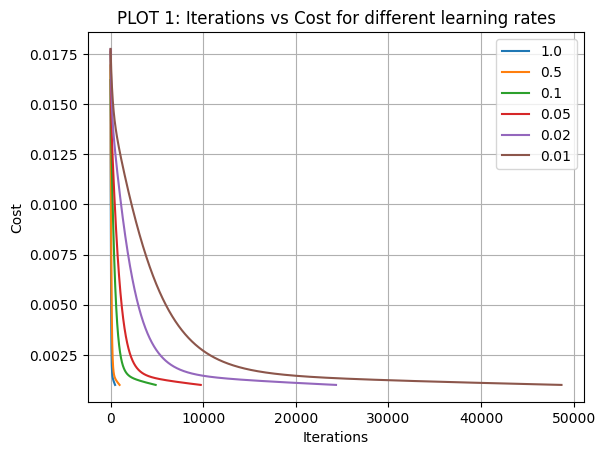

In [387]:
plt.plot(range(i1),cost1)
plt.plot(range(i2),cost2)
plt.plot(range(i3),cost3)
plt.plot(range(i4),cost4)
plt.plot(range(i5),cost5)
plt.plot(range(i6),cost6)
plt.legend(['1.0','0.5','0.1','0.05','0.02','0.01'])
plt.title('''PLOT 1: Iterations vs Cost for different learning rates''')
plt.grid(1)
plt.xlabel('Iterations')
plt.ylabel('Cost')

__Observations from Plot 1 (Sigmoid learning rates):__<br>The higher the learning rate, the sooner it reaches the threshold cost (in this case threshold = 0.001).<br>We will choose scalar = 0.05 for these trials due to its success with ReLu activation (shown later).

In [373]:
NN = Neural_Network()

#Our chosen learning rate for the rest of the trials is 0.03
scalar = 0.05
#To illustrate the gradient ascent we will add 4000 iterations in the opposite direction
opposite = 'yes'
cost_list,i,lowest_yHat = NN.minimizeSigmoidCostFunction(X,y,scalar,opposite)

#Compare y and yHat after gradient descent
print(y)
print(lowest_yHat)
#The last 4000 iterations are in the opposite direction of the gradient 
#Thus we reach the threshold after (i-4000) iterations.
print('The sigmoid activation reaches the threshold cost of 0.001 in {} iterations.'.format(i-2000))

[[0.75]
 [0.8 ]
 [0.93]]
[[0.74477658]
 [0.83074354]
 [0.89794618]]
The sigmoid activation reaches the threshold cost of 0.001 in 11737 iterations.


__Cost vs Iterations with Sigmoid activation.__<br>Last 4000 iterations are in opposite direction of dJdW to demonstrate why we chose the negative direction of the gradient descent.

Text(0, 0.5, 'Cost')

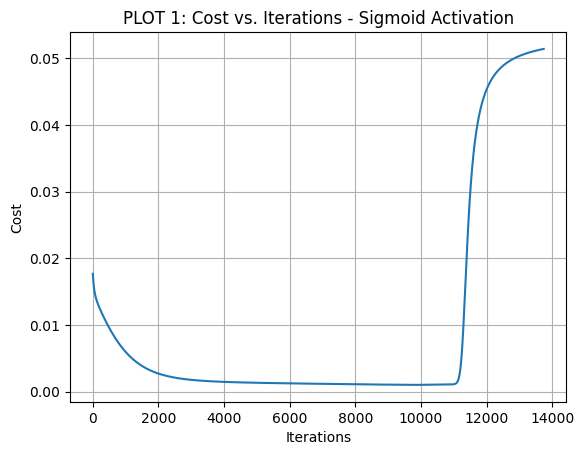

In [374]:
import matplotlib.pyplot as plt
#Plot Cost v Iteration
plt.plot(range(i),cost_list)
plt.grid(1)
plt.title('PLOT 1: Cost vs. Iterations - Sigmoid Activation')
plt.xlabel('Iterations')
plt.ylabel('Cost')

__Problem 2__<br>Use ReLu instead of sigmoid activation.<br>Start by determining an appropriate learning rate scalar. I tested different values until I found the range that gave me the lowest cost the quickest, which was 0.05.

Text(0.5, 1.0, 'PLOT 2: Iterations vs Cost for different learning rates in ReLu')

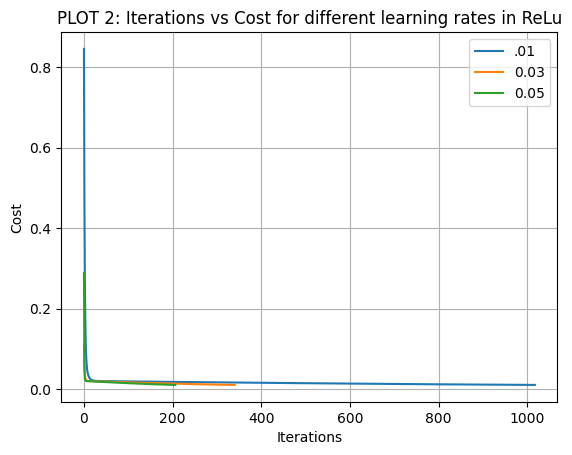

In [386]:
#Test values to find most appropriate learning rate
RN = Neural_Network()
costs1,g1 = RN.minimizeReLuCostFunction(X,y,0.01)
RN = Neural_Network()
costs2,g2 = RN.minimizeReLuCostFunction(X,y,0.03)
RN = Neural_Network()
costs3,g3 = RN.minimizeReLuCostFunction(X,y,0.05)

plt.plot(range(g1),costs1)
plt.plot(range(g2),costs2)
plt.plot(range(g3),costs3)
plt.grid(1)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend(['.01','0.03','0.05'])
plt.title('''PLOT 2: Iterations vs Cost for different learning rates in ReLu''')

In [376]:
RN = Neural_Network()
#Implement gradient descent
costs_ReLu,g = RN.minimizeReLuCostFunction(X,y,scalar)
print('The ReLu activation with 1 hidden layer reaches the threshold cost of 0.001 in {} iterations.'.format(g))

0.009987614160471621
The ReLu activation with 1 hidden layer reaches the threshold cost of 0.001 in 207 iterations.


Text(0, 0.5, 'Cost')

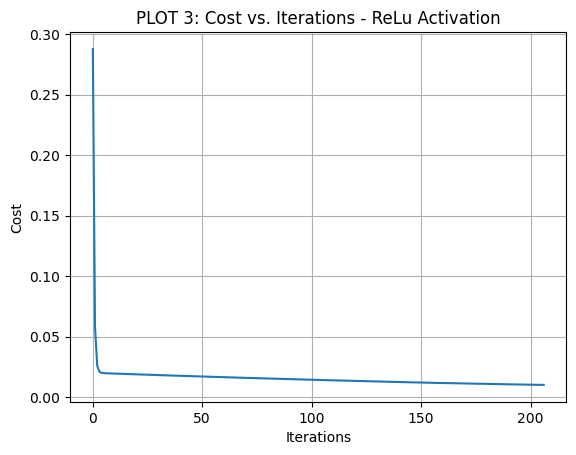

In [377]:
import matplotlib.pyplot as plt
#Plot Cost v Iteration
plt.plot(range(g),costs_ReLu)
plt.grid(1)
plt.title('PLOT 3: Cost vs. Iterations - ReLu Activation')
plt.xlabel('Iterations')
plt.ylabel('Cost')

The ReLu activation requires 9530 less iterations than the Sigmoid activation to achieve cost = 0.001.


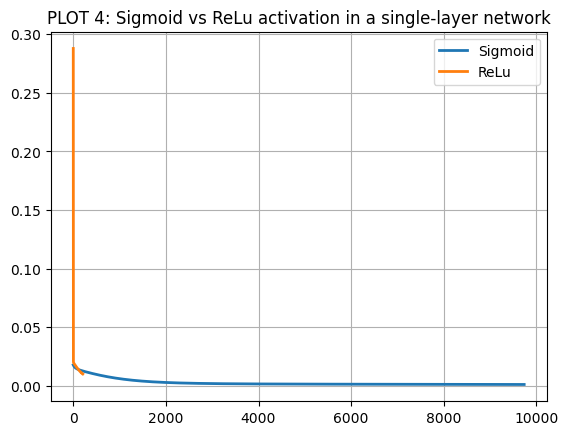

In [378]:
NN = Neural_Network()

#No need to add extra iterations once cost threshold is reached
opposite = 'no'
cost_list,i,lowest_yHat = NN.minimizeSigmoidCostFunction(X,y,scalar,opposite)

#Calculate the difference in iterations between Sigmoid and ReLu activations
diff = i-g
print('The ReLu activation requires {} less iterations than the Sigmoid activation to achieve cost = 0.001.'.format(diff))

plt.plot(range(i), cost_list, linewidth=2)
plt.plot(range(g), costs_ReLu, linewidth=2)
plt.grid(1)
plt.title('PLOT 4: Sigmoid vs ReLu activation in a single-layer network')
plt.legend(['Sigmoid','ReLu'])

__Compare the Sigmoid vs ReLu descent (PLOT 4):__<br>When comparing the two methods, it is clear that while Sigmoid activation smoothly descends towards the right answers, ReLu activation very jaggedly drops towards the correct weights.<br>I originally chose a threshold of 0.05 for the ReLu activation because in some trials the loop behaved unpredictably, though by implementing a seed that stabilized the random values, I was able to use thresholds of 0.01 and 0.001 for the ReLu function as well.<br>I found that the ReLu activation is __much__ quicker than the Sigmoid activation for getting a high degree of accuracy, while the Sigmoid activation is more reliable when the threshold is not as low.

__MORE CLASSES FOR COMPARISONS:__<br>__1__ Create class called __Neural_Network_TEN__ that will have 1 hidden layer of size 10.<br>__2__ Create class called __Neural_Network_Layered__ that will have 2 hidden layers, each of size 3.<br>__3__ Create class called __Neural_Network_TENLayered__ that will have 2 hidden layers, each of size 10.

In [379]:
#Network with 1 hidden layer of size 10
class  Neural_Network_TEN(object):
    def __init__(self):
        #Define HyperParameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize1 = 10
        
        #Set seed to keep weights constant
        np.random.seed(6)
        
        #Define weights
        self.W1 = np.random.randn(self.inputLayerSize, \
                                  self.hiddenLayerSize1)
        self.W2 = np.random.randn(self.hiddenLayerSize1, \
                                  self.outputLayerSize)
        
    def forward(self, X):
        #Propogate inputs through the network
        #z2 is the dot product of a 3x2 matrix and a 2x3 matrix
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.relu(self.z2)
        #z3 is the dot product of a 3x3 matrix and a 3x1 matrix
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.relu(self.z3)
        return yHat
    
    def relu(self, z):
        return np.maximum(0, z)
    
    def reluPrime(self,z):
        return 1 * (z > 0)
     
    def costFunction(self, X, y):
        #Compute cost function J with the generated weights
        self.yHat = self.forward(X)
        J = 0.5 * sum((y-self.yHat)**2)
        return float(J)
    
    def costFunctionPrime(self, X, y):
        #Compute derivative through final layer with respect to W1 and W2
        self.yHat = self.forward(X)
        #delta3 is the back-propogating error
        delta3 = np.multiply(-(y-self.yHat), self.reluPrime(self.z3))
        #dJdW2 is a 2x3 matrix
        dJdW2 = np.dot(self.a2.T, delta3)
        #dJdW1 is a 3X1 matrix
        delta2 = np.dot(delta3, self.W2.T)*(self.reluPrime(self.z2))
        dJdW1 = np.dot(X.T, delta2)
        #dJdW tells us which way is uphill in the gradient descent
        return dJdW1, dJdW2
    
    def minimizeCostFunction(self, X, y, scalar):
        threshold = 0.001
        cost_list = []
        i = 0
        cost_new = self.costFunction(X,y)
        while cost_new > threshold:
        #while i < 1000:
            cost_old = cost_new
            dJdW1,dJdW2 = self.costFunctionPrime(X,y)
            #Store original weights
            origW1 = self.W1
            origW2 = self.W2
            
            #Find weights & cost in the negative direction
            self.W1 = origW1 - scalar*dJdW1
            self.W2 = origW2 - scalar*dJdW2
            
            cost_new = self.costFunction(X,y)
            cost_list.append(cost_new)
            i = i+1
            
        return (cost_list,i)

The ReLu activation with a hidden layer of size 10 reaches threshold cost of 0.001 after 2028 iterations.
That is 7709 iterations less than the amount it takes a network with a hidden layer of size 3 to calculate to the same accuracy.


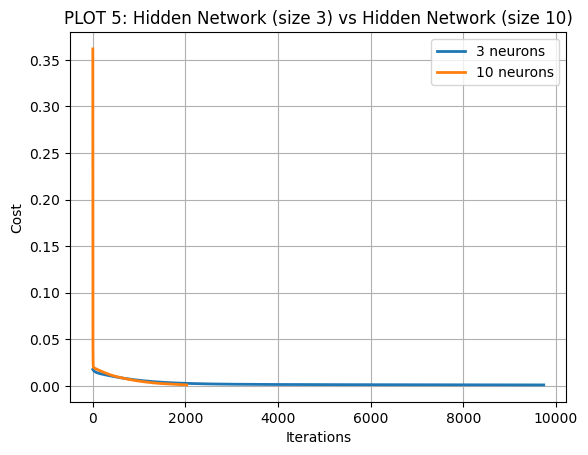

In [385]:
#Set up comparison between the networks of 1 hidden layer
NTen = Neural_Network_TEN()
costs_10,d = NTen.minimizeCostFunction(X,y,.02)
print('The ReLu activation with a hidden layer of size 10 reaches threshold cost of 0.001 after {} iterations.'.format(d))
diff1 = i-d
print('That is {} iterations less than the amount it takes a network with a hidden layer of size 3 to calculate to the same accuracy.'.format(diff1))

plt.plot(range(i), cost_list, linewidth=2)
plt.plot(range(d), costs_10, linewidth=2)
plt.grid(1)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('PLOT 5: Hidden Network (size 3) vs Hidden Network (size 10)')
plt.legend(['3 neurons','10 neurons'])

__COMPARE: Hidden Network of size 3 vs Hidden Network of size 10__<br>Plot 5 (above) illustrates the increased gradient descent speed that adding neurons to a hidden layer can provide.

In [381]:
#Neural Network with 2 hidden layers, each of size 3
class  Neural_Network_Layered(object):
    def __init__(self):
        #Define HyperParameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize1 = 3
        self.hiddenLayerSize2 = 3
        
        #Set seed to keep weights constant
        np.random.seed(7)
        
        #Define weights
        self.W1 = np.random.randn(self.inputLayerSize, \
                                  self.hiddenLayerSize1)
        self.W2 = np.random.randn(self.hiddenLayerSize1, \
                                  self.hiddenLayerSize2)
        self.W3 = np.random.randn(self.hiddenLayerSize2, \
                                  self.outputLayerSize)
        
    def forward(self, X):
        #Propogate inputs through the network
        #z2 is the dot product of a 3x2 matrix and a 2x3 matrix
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.relu(self.z2)
        #z3 is the dot product of a 3x3 matrix and a 3x3 matrix
        self.z3 = np.dot(self.a2, self.W2)
        self.a3 = self.relu(self.z3)
        #z4 is the dot product of a 3x3 matrix and a 3x1 matrix
        self.z4 = np.dot(self.a3, self.W3)
        yHat = self.relu(self.z4)
        return yHat
    
    def relu(self, z):
        return np.maximum(0, z)
    
    def reluPrime(self,z):
        return 1 * (z > 0)
     
    def costFunction(self, X, y):
        #Compute cost function J with the generated weights
        self.yHat = self.forward(X)
        J = 0.5 * sum((y-self.yHat)**2)
        return float(J)
    
    def costFunctionPrime(self, X, y):
        #Compute derivative through final layer with respect to W1 and W2
        self.yHat = self.forward(X)
        #delta4 is the back-propogating error
        delta4 = np.multiply(-(y-self.yHat),self.reluPrime(self.z4))
        dJdW3 = np.dot(self.a3.T, delta4)
                             
        delta3 = np.multiply(-(y-self.yHat), self.reluPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)

        delta2 = np.dot(delta3, self.W2.T)*(self.reluPrime(self.z2))
        dJdW1 = np.dot(X.T, delta2)
        #dJdW tells us which way is uphill in the gradient descent
        return dJdW1, dJdW2, dJdW3
    
    def minimizeCostFunction(self, X, y, scalar):
        threshold = 0.01
        cost_list = []
        i = 0
        cost_new = self.costFunction(X,y)
                             
        #while cost_new > threshold:
        while i < 1000:
            
            dJdW1,dJdW2,dJdW3 = self.costFunctionPrime(X,y)
            #Find weights & cost in the negative direction
            self.W1 = self.W1 - scalar*dJdW1
            self.W2 = self.W2 - scalar*dJdW2
            self.W3 = self.W3 - scalar*dJdW3
            cost_new = self.costFunction(X,y)
            cost_list.append(cost_new)
            i = i+1
            
        return (cost_list,i)

In [382]:
#Neural Network with 2 hidden layers, each of size 10
class  Neural_Network_TENLayered(object):
    def __init__(self):
        #Define HyperParameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize1 = 10
        self.hiddenLayerSize2 = 10
        
        #Set seed to keep weights constant
        np.random.seed(7)
        
        #Define weights
        self.W1 = np.random.randn(self.inputLayerSize, \
                                  self.hiddenLayerSize1)
        self.W2 = np.random.randn(self.hiddenLayerSize1, \
                                  self.hiddenLayerSize2)
        self.W3 = np.random.randn(self.hiddenLayerSize2, \
                                  self.outputLayerSize)
        
    def forward(self, X):
        #Propogate inputs through the network
        #z2 is the dot product of a 3x2 matrix and a 2x3 matrix
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.relu(self.z2)
        #z3 is the dot product of a 3x3 matrix and a 3x3 matrix
        self.z3 = np.dot(self.a2, self.W2)
        self.a3 = self.relu(self.z3)
        #z4 is the dot product of a 3x3 matrix and a 3x1 matrix
        self.z4 = np.dot(self.a3, self.W3)
        yHat = self.relu(self.z4)
        return yHat
    
    def relu(self, z):
        return np.maximum(0, z)
    
    def reluPrime(self,z):
        return 1 * (z > 0)
     
    def costFunction(self, X, y):
        #Compute cost function J with the generated weights
        self.yHat = self.forward(X)
        J = 0.5 * sum((y-self.yHat)**2)
        return float(J)
    
    def costFunctionPrime(self, X, y):
        #Compute derivative through final layer with respect to W1 and W2
        self.yHat = self.forward(X)
        #delta4 is the back-propogating error
        delta4 = np.multiply(-(y-self.yHat),self.reluPrime(self.z4))
        dJdW3 = np.dot(self.a3.T, delta4)
                             
        delta3 = np.multiply(-(y-self.yHat), self.reluPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)

        delta2 = np.dot(delta3, self.W2.T)*(self.reluPrime(self.z2))
        dJdW1 = np.dot(X.T, delta2)
        #dJdW tells us which way is uphill in the gradient descent
        return dJdW1, dJdW2, dJdW3
    
    def minimizeCostFunction(self, X, y, scalar):
        threshold = 0.01
        cost_list = []
        i = 0
        cost_new = self.costFunction(X,y)
                             
        #while cost_new > threshold:
        while i < 1000:
            
            dJdW1,dJdW2,dJdW3 = self.costFunctionPrime(X,y)
            #Find weights & cost in the negative direction
            self.W1 = self.W1 - scalar*dJdW1
            self.W2 = self.W2 - scalar*dJdW2
            self.W3 = self.W3 - scalar*dJdW3
            cost_new = self.costFunction(X,y)
            cost_list.append(cost_new)
            i = i+1
            
        return (cost_list,i)
   

The ReLu activation with 2 hidden layers (size 3) reaches a Cost of 0.03298235835172951 after 1000 iterations.
The ReLu activation with 2 hidden layers (size 10) reaches a Cost of 0.00010661725600170727 after 1000 iterations.


Text(0, 0.5, 'Cost')

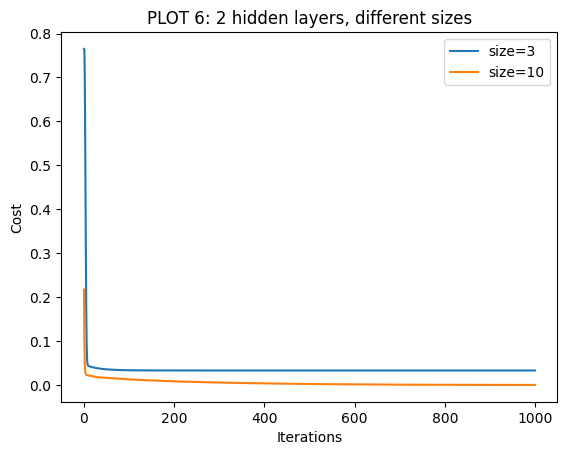

In [383]:
NNL = Neural_Network_Layered()
costs_hl,k = NNL.minimizeCostFunction(X,y,0.03)
lowestcost_hl = costs_hl[k-1]
print('The ReLu activation with 2 hidden layers (size 3) reaches a Cost of {} after {} iterations.'.format(lowestcost_hl,k))

NTenLayered = Neural_Network_TENLayered()
costs_p,p = NTenLayered.minimizeCostFunction(X,y,.03)
lowestcost_p = costs_p[p-1]
print('The ReLu activation with 2 hidden layers (size 10) reaches a Cost of {} after {} iterations.'.format(lowestcost_p,p))

plt.plot(range(k),costs_hl)
plt.plot(range(p),costs_p)
plt.title('PLOT 6: 2 hidden layers, different sizes')
plt.legend(['size=3', 'size=10'])
plt.xlabel('Iterations')
plt.ylabel('Cost')

__COMPARISON (PLOT 6): ReLu with two hidden layers of size 3 vs ReLu with two hidden layers of size 10__<br>The plot above, like Plot 5, illustrates the efficiency that is gained when increasing the amount of neurons in the layers.

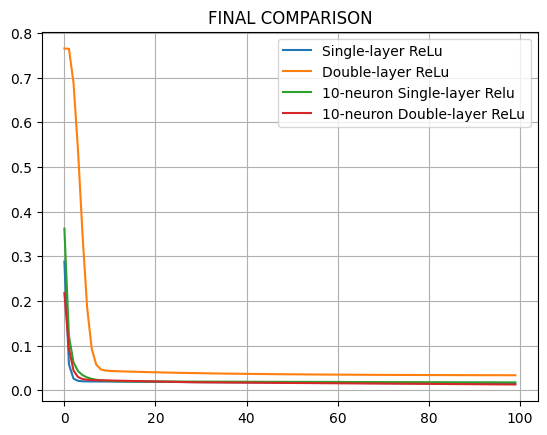

In [384]:
plt.plot(range(100), costs_ReLu[0:100])
plt.plot(range(100),costs_hl[0:100])
plt.plot(range(100),costs_10[0:100])
plt.plot(range(100),costs_p[0:100])
plt.grid(1)
plt.title('FINAL COMPARISON')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend(['Single-layer ReLu', 'Double-layer ReLu', '10-neuron Single-layer Relu', '10-neuron Double-layer ReLu'])

__FINAL COMPARISON:__<br>It is clear that the networks with larger amounts of neurons, whether through added layers or through increased units per layer, have a much easier time propogating through the calculations and delivering a low cost with fewer iterations. In this example, the 10-neuron networks, with both 1 and 2 hidden layers, delivered the highest degree of accuracy.<br>Note: the single-layer networks are from seed(6) while the double-layer networks use seed(7) to avoid error.